<a href="https://colab.research.google.com/github/filipinascimento/openalexnet/blob/main/OpenAlex_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OpenAlex Demo
Welcome to our OpenAlex demo! In this demonstration, we'll guide you through the process of querying OpenAlex and constructing citation and coauthorship networks. By the end of this demo, you'll have a better understanding of how to leverage OpenAlex's capabilities for your research needs. Let's get started!

## Basic usage


### Installation and setup
First, let's install some packages

In [1]:
!pip install openalexnet tqdm pandas matplotlib cairocffi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Lets import the OpenAlexNetworks package and a few other packages.
For more info check: https://github.com/filipinascimento/openalexnet 

In [103]:
from tqdm.auto import tqdm
import openalexnet as oanet
import pandas as pd
import igraph as ig
import matplotlib as mpl
import numpy as np

Now let's initialize OpenAlexNetworks.

You can include your email to accelerate the API calls. See https://openalex.org/api . For instance use `oanet.OpenAlexAPI("username@domain.com")`



In [3]:
openalex = oanet.OpenAlexAPI()

### Queries
Queries are based on three parameters:

- `filter`: Only results passing the filter will be retrieved. See https://docs.openalex.org/how-to-use-the-api/get-lists-of-entities/filter-entity-lists for more information. Defaults to "" (or no filter). Example: `{author.id: "A2420755856", "type": "journal-article"}`.
- `search`: Search string to be used in the OpenAlex API call. Only results matching the search string (in the title, abstract, or fulltext) will be retrieved. See https://docs.openalex.org/how-to-use-the-api/get-lists-of-entities/search-entities for more information. Defaults to "" (or no search). Example: `"complex networks"`.
- `sort`: Defines the order of the output. See https://docs.openalex.org/how-to-use-the-api/get-lists-of-entities/sort-entity-lists for more information. Defaults to "" (or no sort). Example: `"cited_by_count:desc"`

Let's define a filter for this example.

In [4]:
filterData = {
    "author.id": "A2420755856", # Eugene H. Stanley
    "is_paratext": "false",  # Only works, no paratexts (https://en.wikipedia.org/wiki/Paratext)
    "type": "journal-article", # Only journal articles
    "from_publication_date": "2000-01-01" # Published after 2000
}

We are interested in entities of type `works` (papers, reports, preprints, etc).

In [5]:
entityType = "works"

We can now create an entities iterator that will provide the query results.

In [6]:
entities = openalex.getEntities(entityType, filter=filterData)

### Results
To retrieve the data you can loop over the entities. Here we use `tqdm` to show the progress bar.

In [7]:
entitiesList = []
for entity in tqdm(entities,desc="Retrieving entries"):
    entitiesList.append(entity)

Retrieving entries:   0%|          | 0/797 [00:00<?, ?it/s]

Here is the first entry:


In [8]:
entitiesList[0]

{'id': 'https://openalex.org/W2162800060',
 'doi': 'https://doi.org/10.1161/01.cir.101.23.e215',
 'title': 'PhysioBank, PhysioToolkit, and PhysioNet',
 'display_name': 'PhysioBank, PhysioToolkit, and PhysioNet',
 'publication_year': 2000,
 'publication_date': '2000-06-13',
 'ids': {'openalex': 'https://openalex.org/W2162800060',
  'doi': 'https://doi.org/10.1161/01.cir.101.23.e215',
  'mag': '2162800060',
  'pmid': 'https://pubmed.ncbi.nlm.nih.gov/10851218'},
 'primary_location': {'is_oa': True,
  'landing_page_url': 'https://doi.org/10.1161/01.cir.101.23.e215',
  'pdf_url': 'https://www.ahajournals.org/doi/pdf/10.1161/01.CIR.101.23.e215',
  'source': {'id': 'https://openalex.org/S116251202',
   'display_name': 'Circulation',
   'issn_l': '0009-7322',
   'issn': ['1524-4539', '0009-7322'],
   'host_organization': 'https://openalex.org/P4310315671',
   'type': 'journal'},
  'license': 'pd',
  'version': 'publishedVersion'},
 'host_venue': {'id': 'https://openalex.org/S116251202',
  'iss

### Saving results
You can save the data in `jsonl` (JSON Lines format), which is the same file format used by OpenAlex API and snapshots.

In [9]:
oanet.saveJSONLines(entitiesList,"works_filtered.jsonl")

Alternativelly, you can use pandas to save a csv file. Note that nested entries will still be encoded as json objects.

In [10]:
df = pd.DataFrame.from_records(entitiesList)
df.to_csv("works_filtered.csv")
df

id  \
0    https://openalex.org/W2162800060   
1    https://openalex.org/W1968164782   
2    https://openalex.org/W2104085672   
3    https://openalex.org/W2071602085   
4    https://openalex.org/W2133131640   
..                                ...   
792  https://openalex.org/W4223589770   
793  https://openalex.org/W4251517726   
794  https://openalex.org/W4252819614   
795  https://openalex.org/W4283767731   
796   https://openalex.org/W786892091   

                                               doi  \
0       https://doi.org/10.1161/01.cir.101.23.e215   
1              https://doi.org/10.1038/nature08932   
2           https://doi.org/10.1073/pnas.200327197   
3    https://doi.org/10.1016/s0378-4371(02)01383-3   
4                https://doi.org/10.1038/nphys1746   
..                                             ...   
792         https://doi.org/10.1002/adts.202270010   
793            https://doi.org/10.1143/ptp.126.201   
794    https://doi.org/10.1016/j.physa.2018.08.173   
795    https://doi.org/10.1016/j.physa.2022.127889   
796  https://doi.org/10.1080/14697688.2015.1039858   

                                                 title  \
0             PhysioBank, PhysioToolkit, and PhysioNet   
1    Catastrophic cascade of failures in interdepen...   
2                      Classes of small-world networks   
3    Multifractal detrended fluctuation analysis of...   
4    Identification of influential spreaders in com...   
..                                                 ...   
792  Impacts of Export Restrictions on the Global P...   
793             Cooperative Molecular Motions in Water   
794                                            Preface   
795  Most influential countries in the internationa...   
796  Special Issue ofQuantitative Financeon ‘High F...   

                                          display_name  publication_year  \
0             PhysioBank, PhysioToolkit, and PhysioNet              2000   
1    Catastrophic cascade of failures in interdepen...              2010   
2                      Classes of small-world networks              2000   
3    Multifractal detrended fluctuation analysis of...              2002   
4    Identification of influential spreaders in com...              2010   
..                                                 ...               ...   
792  Impacts of Export Restrictions on the Global P...              2022   
793             Cooperative Molecular Motions in Water              2013   
794                                            Preface              2019   
795  Most influential countries in the internationa...              2022   
796  Special Issue ofQuantitative Financeon ‘High F...              2015   

    publication_date                                                ids  \
0         2000-06-13  {'openalex': 'https://openalex.org/W2162800060...   
1         2010-04-15  {'openalex': 'https://openalex.org/W1968164782...   
2         2000-10-10  {'openalex': 'https://openalex.org/W2104085672...   
3         2002-12-15  {'openalex': 'https://openalex.org/W2071602085...   
4         2010-11-01  {'openalex': 'https://openalex.org/W2133131640...   
..               ...                                                ...   
792       2022-04-01  {'openalex': 'https://openalex.org/W4223589770...   
793       2013-05-16  {'openalex': 'https://openalex.org/W4251517726...   
794       2019-01-01  {'openalex': 'https://openalex.org/W4252819614...   
795       2022-07-01  {'openalex': 'https://openalex.org/W4283767731...   
796       2015-07-09  {'openalex': 'https://openalex.org/W786892091'...   

                                      primary_location  \
0    {'is_oa': True, 'landing_page_url': 'https://d...   
1    {'is_oa': None, 'landing_page_url': 'https://d...   
2    {'is_oa': True, 'landing_page_url': 'https://d...   
3    {'is_oa': None, 'landing_page_url': 'https://d...   
4    {'is_oa': True, 'landing_page_url': 'https://d...   
..                                

## Advanced usage

### Queries based on `filter`, `search` and `sort`
Now let's make a more advanced query by providing all the parameters (`filter`, `search`, `sort`)

First let only have papers published in journals after 2020.

In [11]:
filterData = {
        "is_paratext": "false",  # Only works, no paratexts (https://en.wikipedia.org/wiki/Paratext)
        "type": "journal-article", # Only journal articles
        "from_publication_date": "2020-01-01" # Published after 2020
    }

Works with term `"complex network"`

In [12]:
searchString = '"complex network"'

Sorted by the number of citations (descending order)

In [13]:
sortData = [
        "cited_by_count:desc" # sort by number of citations in descending order
    ]

Now let's get the iterator for this query and limit the number of entities to 1000

In [14]:
entities = openalex.getEntities(entityType,
                                filter=filterData,
                                search=searchString,
                                sort=sortData,
                                maxEntities=1000)

<ipython-input-14-50f857690b21>:1: UserWarning: Number of entities (2278) in OpenAlex is larger than the maximum allowed (1000). Only the first 1000 entities will be returned. You can set the maximum number of entities to be returned by setting maxEntities=yourNumber. To ignore this warning, set ignoreEntitiesLimitWarning=True.
  entities = openalex.getEntities(entityType,


We can directly save the entities to the jsonl file using

In [15]:
oanet.saveJSONLines(tqdm(entities,desc="Retrieving entries"),"works_advanced.jsonl")

Retrieving entries:   0%|          | 0/1000 [00:00<?, ?it/s]

### Loading saved JSONLines files
You can load the JSONLines data by using the following command:

In [16]:
loaded_entities = [entity for entity in tqdm(oanet.entitiesFromJSONLines("works_advanced.jsonl"),desc="Loading entities")]
loaded_entities[0]

Loading entities: 0it [00:00, ?it/s]

{'id': 'https://openalex.org/W2984987324',
 'doi': 'https://doi.org/10.1109/tnnls.2019.2946290',
 'title': 'State-Saturated Recursive Filter Design for Stochastic Time-Varying Nonlinear Complex Networks Under Deception Attacks',
 'display_name': 'State-Saturated Recursive Filter Design for Stochastic Time-Varying Nonlinear Complex Networks Under Deception Attacks',
 'publication_year': 2020,
 'publication_date': '2020-10-01',
 'ids': {'openalex': 'https://openalex.org/W2984987324',
  'doi': 'https://doi.org/10.1109/tnnls.2019.2946290',
  'mag': '2984987324',
  'pmid': 'https://pubmed.ncbi.nlm.nih.gov/31725391'},
 'primary_location': {'is_oa': None,
  'landing_page_url': 'https://doi.org/10.1109/tnnls.2019.2946290',
  'pdf_url': None,
  'source': {'id': 'https://openalex.org/S4210175523',
   'display_name': 'IEEE transactions on neural networks and learning systems',
   'issn_l': '2162-237X',
   'issn': ['2162-237X', '2162-2388'],
   'host_organization': 'https://openalex.org/P431031980

### Querying other types of entities
Other types of data can also be obtained using this package.

For instance, let's query the institutions located in Brazil ordered by the number of publications.

First let's setup a filter to include only institutions from Brazil, and set the sort to the number of works.

In [17]:
filterData = {
    "country_code":"BR"
}

sortData = [
    "works_count:desc"
]

We can query using exactly the same approach as before. You can set `maxEntities` to `-1` if you plan to get all the entities. This time we need to set `entityType` to `"institutions"`. We will save the results to a list.

In [18]:
entityType = "institutions"
entities = openalex.getEntities(entityType,
                                filter=filterData,
                                sort=sortData,
                                maxEntities=-1)

entitiesList = [entity for entity in tqdm(entities,desc="Retrieving entries",leave=False)]

Retrieving entries:   0%|          | 0/1805 [00:00<?, ?it/s]

Let's see the top 10 entries:

In [19]:
dfInstitutions = pd.DataFrame.from_records(entitiesList[:10])
dfInstitutions[["works_count","display_name"]]

works_count                             display_name
0       184896                Universidade de São Paulo
1       122411             State University of Campinas
2       116073               São Paulo State University
3       108131  Federal University of Rio Grande do Sul
4       106206     Federal University of Rio de Janeiro
5        89316     Universidade Federal de Minas Gerais
6        68978   Universidade Federal de Santa Catarina
7        62283             Federal University of Paraná
8        57907                   University of Brasília
9        55066          Federal University of São Paulo

## Building Networks


### Citation networks
Now we will create our first network. We can, for instance, create a citation network from the works of a given researcher. Any works query can be used to create a citation network.

First let's setup a filter to query for papers of an author.

In [20]:
filterData = {
    "author.id": "A2420755856", # Eugene H. Stanley
    "is_paratext": "false",  # Only works, no paratexts (https://en.wikipedia.org/wiki/Paratext)
    "type": "journal-article", # Only journal articles
}

We need to set the entity type to works and the the entity iterator.

In [21]:
entityType = "works"
entities = openalex.getEntities(entityType, filter=filterData)

To create the network, you can pass the entity iterator to the `createNetworks` method.

In [22]:
networks = oanet.createNetworks(entities,
                                networkTypes=["citation"],
                                simplifyNetworks=True,
                                showProgress=True)

Extracting edges and attributes:   0%|          | 0/1290 [00:00<?, ?it/s]

The resulting network is an igraph object. Check the igraph documentation for manipulating such graphs. https://python.igraph.org/en/stable/tutorial.html 

In [23]:
citation_network = networks["citation"]
print(citation_network.summary())

IGRAPH D--T 1290 7125 -- 
+ attr: authorships (v), concepts (v), display_name (v), doi (v), host_venue (v), id (v), publication_date (v), publication_year (v), title (v), type (v)


We can save this network to a gml or edgelist+csv files using.

In [24]:
networks["citation"].write_gml("citation_network.gml")

oanet.saveNetworkEdgesCSV(networks["citation"],"citation_network.edgelist")

Finally, we can visualize the network.

First let's just get the weak connected component.

In [31]:
citation_network_major = citation_network.components("weak").giant()

Next, we can detect communities in this network.

In [71]:
citation_network_major["community"] = citation_network_major.as_undirected().community_multilevel().membership

We can use the following snipped of code to visualize the network. Check the igraph tutorial for more options. 

https://igraph.org/python/tutorial/0.9.8/tutorial.html

In [90]:
vertex_colors = [mpl.cm.tab20(index) for index in citation_network_major["community"]]
edge_colors = [vertex_colors[edge.source][:-1]+(0.25,) for edge in citation_network_major.es]
# labels = citation_network_major.vs["display_name"]
layout = citation_network_major.layout("fr")
ig.plot(citation_network_major,
        layout = layout,
        # vertex_label = labels,
        vertex_label_size = 1,
        vertex_size = 5,
        vertex_color = vertex_colors,
        edge_arrow_size = 0.4,
        edge_color = edge_colors
        )

### Collaboration (coauthorship) networks
We can apply the same dataflow to create collaboration networks. However, we should provide `coauthorship` as a networkType. Note that multiple networks can be generated with the same call. 

In [95]:
entityType = "works"
entities = openalex.getEntities(entityType, filter=filterData)

networks = oanet.createNetworks(entities,
                                networkTypes=["coauthorship"],
                                simplifyNetworks=True,
                                showProgress=True)

Extracting edges and attributes:   0%|          | 0/1290 [00:00<?, ?it/s]

Generating coauthorship network:   0%|          | 0/1290 [00:00<?, ?it/s]

Here is the summary of the collaboration network.

In [98]:
coauthorship_network = networks["coauthorship"]
print(coauthorship_network.summary())

IGRAPH U-W- 1227 5948 -- 
+ attr: Institutions (v), InstitutionsIDs (v), display_name (v), id (v), orcid (v), count (e), firstYear (e), lastYear (e), normalized_weight (e), weight (e)


Just as before, we can save this network to a gml or edgelist+csv files using.

In [99]:
networks["coauthorship"].write_gml("coauthorship_network.gml")

oanet.saveNetworkEdgesCSV(networks["coauthorship"],"coauthorship_network.edgelist")

For the next analyses, we need to remove the original node (the focus author).

In [123]:
max_degree_node = coauthorship_network.vs.select(_degree = max(coauthorship_network.degree()))[0]

# Remove the node with the highest degree
coauthorship_network.delete_vertices(max_degree_node.index)

Finally, we can visualize the network.

First let's just get the weak connected component.

In [124]:
coauthorship_network_major = coauthorship_network.components("weak").giant()

Next, we can detect communities in this network.

In [125]:
coauthorship_network_major["community"] = coauthorship_network_major.as_undirected().community_multilevel().membership

We can use the following snipped of code to visualize the network. Check the igraph tutorial for more options. 

https://igraph.org/python/tutorial/0.9.8/tutorial.html

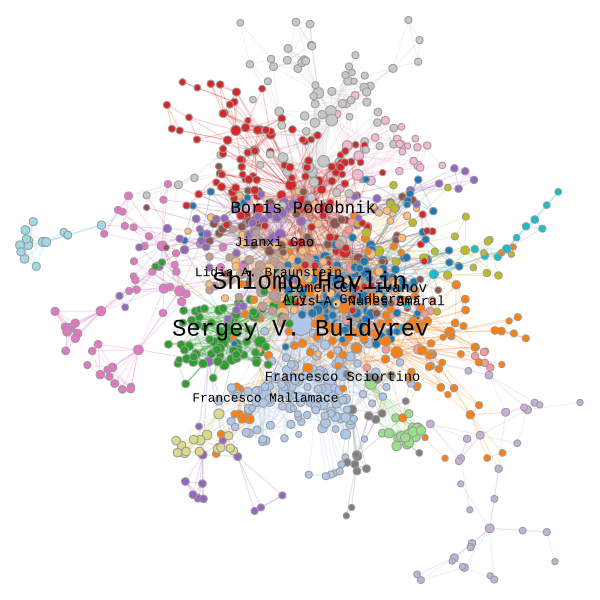

In [130]:
vertex_colors = [mpl.cm.tab20(index) for index in coauthorship_network_major["community"]]
edge_colors = [vertex_colors[edge.source][:-1]+(0.25,) for edge in coauthorship_network_major.es]
labels = coauthorship_network_major.vs["display_name"]
vertex_size =  np.array(coauthorship_network_major.degree()).astype("float64")**0.5
vertex_size /= np.max(vertex_size)
vertex_size *= 20.0
vertex_size += 5.0
topNames = set(vertex_size.argsort()[-10:][::-1])
labels = [label if i in topNames else "" for i, label in enumerate(labels)]

layout = coauthorship_network_major.layout("fr")
ig.plot(coauthorship_network_major,
        layout = layout,
        vertex_label = labels,
        vertex_label_size = vertex_size,
        vertex_size = vertex_size,
        vertex_frame_color = "#999999",
        vertex_color = vertex_colors,
        edge_arrow_size = 0.4,
        edge_color = edge_colors
        )